# **CLASSIFIERS BASED ON BAYES DECISION THEORY**

# **Introduction**

In this unit, we discuss **classifiers based on Bayesian decision theory**, which are based on the idea of design classifiers that classify an unknown pattern in the **most probable** class. So the So the question is how to define what *most probable* means.

Given a classification task of $M$ classes, $\omega_1,  \omega_2, \ldots,  \omega_M$, and an unknown pattern, which is represented by a feature vector $x$, we form the $M$ conditional probabilities
$$P(\omega_i|X=x), \ i=1,2,\ldots,M$$
that is, the probability that the unknown pattern belongs to the respective class $\omega_i$, given that we know its feature vector takes the value $x$. These are also referred to as a **posteriori probabilities**.

The classifiers based on Bayes decision theory quantify the **most probable** class, by computing either the maximum of these $M$ values or, equivalently, the maximum of an appropriately defined function of them. The unknown pattern is then assigned to the class corresponding to this **maximum**

# **Bayes Decision Theory**

We will initially focus on the **two-class case**. Let $\omega_1$, $\omega_2$ be the two classes in which our patterns belong.

> We assume that the **a priori probabilities** $P(\omega_1)$ $P(\omega_2)$ are known. This is a reasonable assumption, because even if they are not known exactly, they can easily be estimated from the available training feature vectors.
> > If $N$ is the total number of available training patterns, and $N_1$ $N_2$ of them belong to $\omega_1$ and $\omega_2$, respectively, then
$$P(\omega_1) \approx \frac{N_1}{N}$$
$$P(\omega_2) \approx \frac{N_2}{N}$$

> We also assume that the **class-conditional probability density functions**
$$p(x | \omega_i), \ i=1,2$$
are known. These describe the distribution of the known feature vectors in each of the classes.
>> If these are not known, they can also be estimated from the available training data.

The **pdf (probability density function**) is sometimes referred to as the **likelihood function** of $\omega_i$ with respect to $x$. If the feature vectors can take only discrete values, density functions $p(x | \omega_i)$ become  probabilities (**mass probability function**) and will be denoted by $P(x| \omega_i)$.

Using **Bayes' rule**, we can calculate the conditional probabilities:
$$P(\omega_i | X=x) = \frac{p(x| \omega_i)P(\omega_i)}{p(x)}$$
where $p(x)$ is the pdf of $x$ and for which we have
$$p(x) = \sum_{i=1}^2 p(x|\omega_i) P(\omega_i)$$

The **Bayes classification rule** can now be stated as:

$$\text{If} \qquad P(\omega_1 | x) > P(\omega_2 | x), \ x \rightarrow \omega_1$$

$$\text{If} \qquad P(\omega_1 | x) < P(\omega_2 | x), \ x \rightarrow \omega_2$$

In the case of **equality**, $P(\omega_1|x) = P(\omega_2|x)$, the pattern is arbitrarily assigned to one of the two classes.

> So the only task is to estimate:
* $P(\omega_i)$ (priori probabilities)
* $p(x|\omega_i)$ (likelihood function of $\omega_i$ with respect to $X$)

Using **Bayes' rule**, the decision can equivalently be based on the inequalities
$$p(x|\omega_1) P(\omega_1) \gtrless p(x|\omega_2) P(\omega_2)$$
$p(x)$ is not taken into account, because it is the same for all classes and it does not affect the decision.

# **Example**

### Iris dataset

It is a dataset about 3 types of flowers:
* [Setosa](https://en.wikipedia.org/wiki/Iris_setosa#/media/File:Irissetosa1.jpg)
* [Versicolor](https://en.wikipedia.org/wiki/Iris_versicolor#/media/File:Blue_Flag,_Ottawa.jpg)
* [Virginica](https://en.wikipedia.org/wiki/Iris_virginica#/media/File:Iris_virginica_2.jpg)

Which contains information on 4 features of each flower:
* Length and width of the sepal
* Length and width of the petal


The data was collected by botanist Edgar Anderson and used by statistician Ronald Fischer to show an example of his linear discriminant analysis.

In [265]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.datasets import load_iris
from scipy import stats

In [266]:
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]

In [267]:
var_x = "sepal length (cm)"
var_y = "sepal width (cm)"
x_lim = [3, 9]
y_lim = [1, 5]
colors=["red", "blue", "darkgreen"]

Let
$$X : \Omega \rightarrow \mathbb{R}^2$$
be a random vector that represent 2 features of a pattern set.

We assume that each pattern in $\Omega$ belongs to a class to a specific class:
- Setosa ($\omega_1$).
- Versicolor ($\omega_2$).
- Virginica ($\omega_3$).

In [268]:
def draw_joint(data, var_x, var_y,
               x_lim = [3, 9],y_lim = [1, 5]):
  sns.jointplot(data=data, x=var_x, y=var_y,
                hue="target", palette=colors)
  plt.ylim(ymin=y_lim[0], ymax=y_lim[1])
  plt.xlim(xmin=x_lim[0], xmax=x_lim[1])
  plt.show()

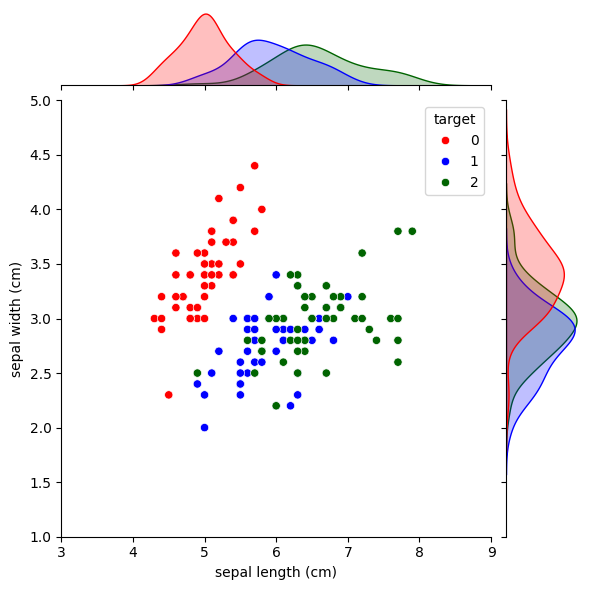

In [269]:
draw_joint(df, var_x, var_y)

### **Estimated density function of $X$ $$p(\textbf{x})$$**

In [270]:
cmap = "plasma"

def kde_2d(X, Y):
  xmin = X.min()
  xmax = X.max()
  ymin = Y.min()
  ymax = Y.max()
  xs, ys = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xs.ravel(), ys.ravel()])
  values = np.vstack([X, Y])
  kernel = stats.gaussian_kde(values)
  zs = np.reshape(kernel(positions).T, xs.shape)
  return xs, ys, zs, kernel

def draw_kde_2d(data, var_x, var_y, save=False):
  X = np.array(data[var_x])
  Y = np.array(data[var_y])
  xs, ys, zs, kde = kde_2d(X, Y)
  surface = go.Surface(z=zs, x=xs, y=ys, opacity=0.5, colorscale=cmap)
  fig = go.Figure(data=[surface])
  fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True))
  fig.show()

def draw_kde(data, var_x, var_y, color="black", ax=None):
  if ax is None:
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
  sns.kdeplot(data=data, x=var_x, y=var_y, cmap=cmap, alpha = 0.7, ax=ax)
  sns.scatterplot(data=data, x=var_x, y=var_y,
                  marker='.', color=color, s=100, ax=ax)
  ax.set_ylim(ymin=y_lim[0], ymax=y_lim[1])
  ax.set_xlim(xmin=x_lim[0], xmax=x_lim[1])
  return ax

In [271]:
draw_kde_2d(df, var_x, var_y)

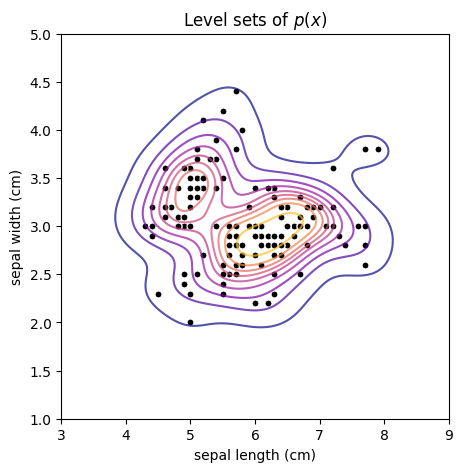

In [272]:
ax = draw_kde(df, var_x, var_y)
ax.set_title(f"Level sets of $p(x)$")
plt.show()

### **Probability of each class (*priori probabilities*) $$P(\omega_i)$$**

In [273]:
w = {}
for i in range(3):
  w[i] = df[df["target"]==i]
  pr_w = (len(w[i])/(len(df)))
  print(f"Probability of class {i}: {pr_w}")

Probability of class 0: 0.3333333333333333
Probability of class 1: 0.3333333333333333
Probability of class 2: 0.3333333333333333


### **Class-conditional probability density functions $$p(x|\omega_i)$$**

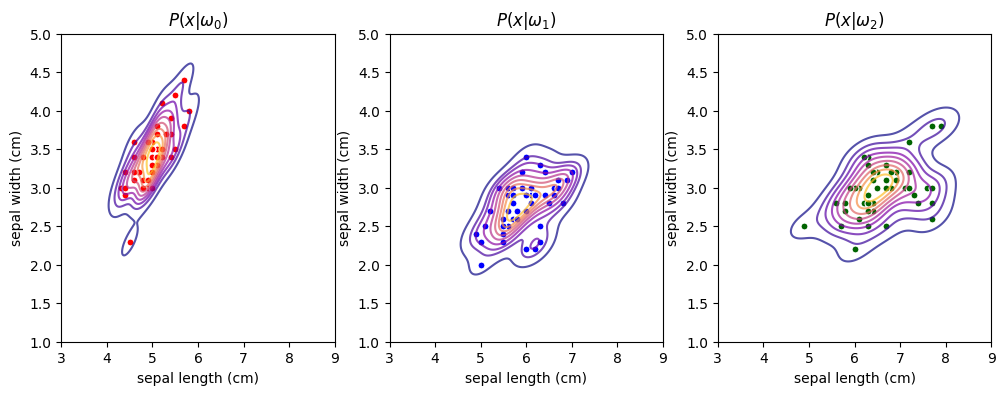

In [274]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i in range(3):
  ax[i] = draw_kde(w[i], var_x, var_y, colors[i], ax[i])
  ax[i].set_title(f"$P(x|\omega_{i})$")

### **Bayesian classification rule**

In [275]:
x0, y0, z0, kde0 = kde_2d(w[0][var_x], w[0][var_y])
x1, y1, z1, kde1 = kde_2d(w[1][var_x], w[1][var_y])
x2, y2, z2, kde2 = kde_2d(w[2][var_x], w[2][var_y])
opacity = 0.6
fig = go.Figure(data=[
    go.Surface(z=z0, x=x0, y=y0, opacity=opacity, showscale=False,
               colorscale=[[0, "red"], [1, "red"]]),
    go.Surface(z=z1, x=x1, y=y1, opacity=opacity, showscale=False,
               colorscale=[[0, "blue"], [1, "blue"]]),
    go.Surface(z=z2, x=x2, y=y2, opacity=opacity, showscale=False,
               colorscale=[[0, "darkgreen"], [1, "darkgreen"]])
])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="black", project_z=True))
go.Figure.write_html(fig, "file.html")
fig.show()

In [276]:
def BayesianRule(x):
  for i in range(3):
    w = df[df["target"]==i]
    _, _, _, kde = kde_2d(w[var_x], w[var_y])
    pr_class_x = kde(x)*(len(w)/(len(df)))
    print(f"Clase {i}: {pr_class_x}")

In [277]:
x = [4.8, 2.7]

In [278]:
BayesianRule(x)

Clase 0: [0.04133813]
Clase 1: [0.01247693]
Clase 2: [0.00812357]


In [279]:
def draw_classes(data, var_x, var_y, colors):
  sns.scatterplot(data=data, x=var_x, y=var_y, hue="target",
                  palette=colors, legend=True)
  plt.ylim(ymin=y_lim[0], ymax=y_lim[1])
  plt.xlim(xmin=x_lim[0], xmax=x_lim[1])

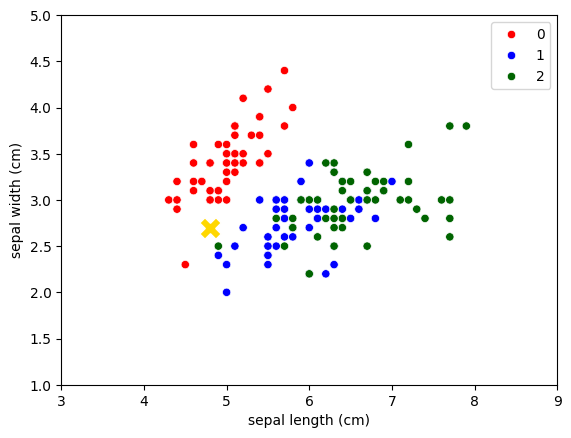

In [280]:
draw_classes(df, var_x, var_y,  colors)
sns.scatterplot(x=[x[0]], y=[x[1]], marker='X', color="gold", s=250)
plt.show()

# **Appendix**

**Definition: Conditional Probability**

Let $(\Omega, \mathscr{F}, P)$ be a probability space and let $B\in \mathscr{F}$ be an event such that $P(B)>0$.

For any $A\in \mathscr{F}$, we define the **conditional probability of $A$ given $B$**, that we will denote $P(A|B)$ by
$$P(A|B) = \frac{P(A\cap B)}{P(B)}$$

**Proposition**

Let ($\Omega, \mathscr{F}, P)$ be a probability space and let $B\in \mathscr{F}$ be an event such that $P(B)>0$. Then

1. $P(\cdot|B)$ is a probability measure on the measurable space $(B, \mathscr{F}_B)$, where $\mathscr{F}_B=\{A\cap B | A\in \mathscr{F}\}$.
2. If $A$ and $B$ are independent events, then
$$P(A|B) = P(A)$$
3. **[Bayes' rule]** If $\{A_i\}_{i=1}^n \subset \mathscr{F}$ is a measurable partition of $\Omega$, such that $P(A_i) > 0, \ i=1,\ldots,n$. Then
$$P(A_i | B) = \frac{P(A_i) P(B|A_i)}{\sum_{k=1}^n P(A_k) P(B|A_k)}, \qquad \forall i=1,\ldots,n$$



**Proof of Bayes' rule**

- Let $\{A_i\}_{i=1}^n \subset \mathscr{F}$ be a measurable partition of $\Omega$, such that $P(A_i)>0$ for every $i=1,\ldots,n$.
- Then $\Omega = \cup_{i=1}^n A_i$ and the $A_i'$s are disjoint.
- Then $$P(B) = P(\Omega \cap B)= \sum_{i=1}^n P(A_i \cap B)$$
- Therefore
$$\begin{eqnarray} P(A_i|B) &=& \frac{P(A_i\cap B)}{P(B)}\\ &=& \frac{P(B|A_i)P(A_i)}{\sum_{k=1}^n P(A_k \cap B) } \\ &=& \frac{P(B|A_i)P(A_i)}{\sum_{k=1}^n P(B|A_k) P(A_k)}\end{eqnarray}$$
and Bayes' rule is proved.

For case $\{A_1, A_2\}$, Bayes' rule ensures that
$$P(A_1| B) = \frac{P(B|A_1)P(A_1)}{P(B|A_1)P(A_1)+P(B|A_2)P(A_2)}$$
equivalently for $P(A_2|B)$

# **References**

- González-Barrios Murguía, J.M. (2011). **Lecture Notes on Probability Theory**, UNAM-IIMAS.
- Theodoridis, S. \& Koutroumbas, K. (2009) **Pattern Recognition**, 4th ed., Academic Press.